# IoT GNN Demo

## Env Setup
Refer to the README.

## Imports

In [1]:
from configuration import *

from models import e_graphsage, fnn_model, e_graphsage_hembed
from data import IoTDataset
import train
from train import ModelTrainer
import tester

/home/rowleyra/anaconda3/envs/iot_env/lib/python3.11/site-packages/torchdata/datapipes/__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()
/home/rowleyra/anaconda3/envs/iot_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# NF-BoT-IoT

## Randomized IP Addresses and Ports

### Load Data
This assumes there is a "data" folder under the root of the IoT_GNN repo.  
Datasets can be found at: https://drive.google.com/drive/folders/14t41P09gXTsCqPx3YFN1Pruwb2eZQrkT?usp=share_link

In [2]:
multiclass = True
randomized_ip_train_data = IoTDataset(version=1, multiclass=multiclass)
randomized_ip_val_data = IoTDataset(version=1, multiclass=multiclass, split='val')
randomized_ip_test_data = IoTDataset(version=1, multiclass=multiclass, split='test')

### Model Initialization

In [3]:
# Multiclass
model_egs = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=randomized_ip_train_data.num_features,
                                num_classes=len(randomized_ip_train_data.classes)
                              )
model_egs_cpu = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=randomized_ip_train_data.num_features,
                                num_classes=len(randomized_ip_train_data.classes)
                              )
model_fnn = fnn_model.TestFNN(num_hidden_layers=2,
                              hidden_layer_widths=[128, 192],  # Should be approximately comparable to EGS
                              num_edge_attr=randomized_ip_train_data.num_features,
                              num_classes=len(randomized_ip_train_data.classes),
                            )
model_egsh = e_graphsage_hembed.E_GraphSAGE_hEmbed(numLayers=2,
                                                   dim_node_embed=96,       # Approximately equal parameter count as EGS
                                                   num_edge_attr=randomized_ip_train_data.num_features,
                                                   num_classes=len(randomized_ip_train_data.classes)
                                                  )

In [4]:
# Multiclass
# 175 epochs sufficient for EGS to get plateau of validation risk.
egs_training_config = {
        'num_epochs': 300,
        'lr': 1e-3,
        'gpu': True,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egs_training_config_cpu = {
        'num_epochs': 300,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
# 205 epochs for the FNN
fnn_training_config = {
        'num_epochs': 205,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egsh_training_config = {
        'num_epochs': 205,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}

### Training

In [5]:
import importlib
importlib.reload(train)

<module 'train' from '/home/rowleyra/IoT_GNN/train.py'>

In [6]:
# Instantiate Trainer
# Multiclass
egs_trainer = ModelTrainer(egs_training_config, randomized_ip_train_data, randomized_ip_val_data)
egs_trainer_cpu = ModelTrainer(egs_training_config_cpu, randomized_ip_train_data, randomized_ip_val_data)
fnn_trainer = ModelTrainer(fnn_training_config, randomized_ip_train_data, randomized_ip_val_data)
egsh_trainer = ModelTrainer(egsh_training_config, randomized_ip_train_data, randomized_ip_val_data)

In [7]:
# Train the GNN
_ = egs_trainer.train_model(model_egs, False)

Training E_GraphSAGE_K2_H128:   0%|          | 1/300 [00:00<02:00,  2.48epoch/s, train loss=1.6317, validation loss=1.5926, learning rate=1.00e-03, F1 score=0.01406]

[Epoch 0] logit mean: 0.0022, std: 0.0538


Training E_GraphSAGE_K2_H128:   9%|▊         | 26/300 [00:05<00:50,  5.39epoch/s, train loss=1.1726, validation loss=1.1625, learning rate=1.00e-03, F1 score=0.76564]

[Epoch 25] logit mean: 0.0730, std: 0.6507


Training E_GraphSAGE_K2_H128:  17%|█▋        | 51/300 [00:09<00:42,  5.89epoch/s, train loss=0.9387, validation loss=0.9363, learning rate=1.00e-03, F1 score=0.76621]

[Epoch 50] logit mean: 0.1027, std: 1.3752


Training E_GraphSAGE_K2_H128:  25%|██▌       | 76/300 [00:15<00:44,  5.01epoch/s, train loss=0.7968, validation loss=0.8356, learning rate=1.00e-03, F1 score=0.76571]

[Epoch 75] logit mean: 0.0256, std: 1.8301


Training E_GraphSAGE_K2_H128:  34%|███▍      | 102/300 [00:20<00:37,  5.27epoch/s, train loss=0.7593, validation loss=0.7949, learning rate=1.00e-03, F1 score=0.76531]

[Epoch 100] logit mean: -0.0193, std: 2.2165


Training E_GraphSAGE_K2_H128:  42%|████▏     | 126/300 [00:24<00:29,  5.93epoch/s, train loss=0.6959, validation loss=0.7698, learning rate=1.00e-03, F1 score=0.79254]

[Epoch 125] logit mean: -0.0424, std: 2.6319


Training E_GraphSAGE_K2_H128:  50%|█████     | 151/300 [00:29<00:35,  4.19epoch/s, train loss=0.6566, validation loss=0.7388, learning rate=1.00e-03, F1 score=0.78873]

[Epoch 150] logit mean: -0.0648, std: 2.8326


Training E_GraphSAGE_K2_H128:  59%|█████▊    | 176/300 [00:34<00:23,  5.17epoch/s, train loss=0.6627, validation loss=0.7206, learning rate=1.00e-03, F1 score=0.78200]

[Epoch 175] logit mean: -0.0884, std: 3.0643


Training E_GraphSAGE_K2_H128:  67%|██████▋   | 201/300 [00:39<00:23,  4.26epoch/s, train loss=0.6382, validation loss=0.7007, learning rate=1.00e-03, F1 score=0.77707]

[Epoch 200] logit mean: -0.0878, std: 3.2737


Training E_GraphSAGE_K2_H128:  75%|███████▌  | 226/300 [00:44<00:13,  5.45epoch/s, train loss=0.6182, validation loss=0.6882, learning rate=1.00e-03, F1 score=0.77866]

[Epoch 225] logit mean: -0.0942, std: 3.4157


Training E_GraphSAGE_K2_H128:  84%|████████▎ | 251/300 [00:49<00:11,  4.43epoch/s, train loss=0.6497, validation loss=0.6924, learning rate=1.00e-04, F1 score=0.77740]

[Epoch 250] logit mean: -0.0977, std: 3.5282


Training E_GraphSAGE_K2_H128:  92%|█████████▏| 276/300 [00:55<00:05,  4.59epoch/s, train loss=0.6039, validation loss=0.6922, learning rate=1.00e-05, F1 score=0.74902]

[Epoch 275] logit mean: -0.0990, std: 3.5424


Training E_GraphSAGE_K2_H128: 100%|██████████| 300/300 [00:59<00:00,  5.00epoch/s, train loss=0.6337, validation loss=0.6921, learning rate=1.00e-06, F1 score=0.77782]


In [8]:
# Train the GNN
_ = egs_trainer_cpu.train_model(model_egs_cpu, False)

Training E_GraphSAGE_K2_H128:   0%|          | 1/300 [00:01<07:15,  1.46s/epoch, train loss=1.6302, validation loss=1.5977, learning rate=1.00e-03, F1 score=0.02493]

[Epoch 0] logit mean: -0.0476, std: 0.0444


Training E_GraphSAGE_K2_H128:   9%|▊         | 26/300 [00:33<05:49,  1.28s/epoch, train loss=1.1255, validation loss=1.1277, learning rate=1.00e-03, F1 score=0.76346]

[Epoch 25] logit mean: -0.0459, std: 0.7051


Training E_GraphSAGE_K2_H128:  17%|█▋        | 51/300 [01:06<06:09,  1.48s/epoch, train loss=0.9226, validation loss=0.9297, learning rate=1.00e-03, F1 score=0.76597]

[Epoch 50] logit mean: -0.0574, std: 1.3721


Training E_GraphSAGE_K2_H128:  25%|██▌       | 76/300 [01:40<04:39,  1.25s/epoch, train loss=0.7674, validation loss=0.8418, learning rate=1.00e-03, F1 score=0.76450]

[Epoch 75] logit mean: -0.0448, std: 1.7068


Training E_GraphSAGE_K2_H128:  34%|███▎      | 101/300 [02:11<04:05,  1.23s/epoch, train loss=0.7371, validation loss=0.7851, learning rate=1.00e-03, F1 score=0.76216]

[Epoch 100] logit mean: -0.0649, std: 2.0332


Training E_GraphSAGE_K2_H128:  42%|████▏     | 126/300 [02:42<03:37,  1.25s/epoch, train loss=0.7122, validation loss=0.7594, learning rate=1.00e-03, F1 score=0.76163]

[Epoch 125] logit mean: -0.1229, std: 2.3561


Training E_GraphSAGE_K2_H128:  50%|█████     | 151/300 [03:15<03:08,  1.27s/epoch, train loss=0.6621, validation loss=0.7282, learning rate=1.00e-03, F1 score=0.75091]

[Epoch 150] logit mean: -0.1504, std: 2.5380


Training E_GraphSAGE_K2_H128:  59%|█████▊    | 176/300 [03:46<02:33,  1.24s/epoch, train loss=0.6560, validation loss=0.7173, learning rate=1.00e-03, F1 score=0.75093]

[Epoch 175] logit mean: -0.1618, std: 2.7424


Training E_GraphSAGE_K2_H128:  67%|██████▋   | 201/300 [04:18<02:07,  1.29s/epoch, train loss=0.6710, validation loss=0.7167, learning rate=1.00e-03, F1 score=0.75345]

[Epoch 200] logit mean: -0.1787, std: 2.9889


Training E_GraphSAGE_K2_H128:  75%|███████▌  | 226/300 [04:50<01:34,  1.28s/epoch, train loss=0.6474, validation loss=0.6940, learning rate=1.00e-03, F1 score=0.75050]

[Epoch 225] logit mean: -0.2001, std: 3.0938


Training E_GraphSAGE_K2_H128:  84%|████████▎ | 251/300 [05:24<01:00,  1.24s/epoch, train loss=0.6043, validation loss=0.6968, learning rate=1.00e-03, F1 score=0.74899]

[Epoch 250] logit mean: -0.2039, std: 3.2601


Training E_GraphSAGE_K2_H128:  92%|█████████▏| 276/300 [05:56<00:29,  1.22s/epoch, train loss=0.6095, validation loss=0.6897, learning rate=1.00e-04, F1 score=0.74793]

[Epoch 275] logit mean: -0.2219, std: 3.3575


Training E_GraphSAGE_K2_H128: 100%|██████████| 300/300 [06:30<00:00,  1.30s/epoch, train loss=0.6402, validation loss=0.6867, learning rate=1.00e-05, F1 score=0.74815]


In [9]:
# Train the FCNN
_ = fnn_trainer.train_model(model_fnn, False)

Training FCNN_K2:   0%|          | 1/205 [00:00<02:40,  1.27epoch/s, train loss=1.6629, validation loss=1.5831, learning rate=1.00e-03, F1 score=0.04312]

[Epoch 0] logit mean: 0.0064, std: 0.0772


Training FCNN_K2:  13%|█▎        | 26/205 [00:21<02:39,  1.12epoch/s, train loss=1.2531, validation loss=1.1305, learning rate=1.00e-03, F1 score=0.76837]

[Epoch 25] logit mean: 0.0501, std: 0.6168


Training FCNN_K2:  25%|██▍       | 51/205 [00:42<02:14,  1.14epoch/s, train loss=1.1559, validation loss=0.9722, learning rate=1.00e-03, F1 score=0.75684]

[Epoch 50] logit mean: 0.0625, std: 1.0686


Training FCNN_K2:  37%|███▋      | 76/205 [01:05<01:53,  1.14epoch/s, train loss=1.1059, validation loss=0.8947, learning rate=1.00e-03, F1 score=0.76892]

[Epoch 75] logit mean: 0.0525, std: 1.3364


Training FCNN_K2:  49%|████▉     | 101/205 [01:27<01:44,  1.01s/epoch, train loss=1.0820, validation loss=0.8448, learning rate=1.00e-03, F1 score=0.75437]

[Epoch 100] logit mean: 0.0512, std: 1.5899


Training FCNN_K2:  61%|██████▏   | 126/205 [01:52<01:14,  1.06epoch/s, train loss=1.0676, validation loss=0.8168, learning rate=1.00e-03, F1 score=0.77006]

[Epoch 125] logit mean: 0.0471, std: 1.7904


Training FCNN_K2:  74%|███████▎  | 151/205 [02:13<00:45,  1.19epoch/s, train loss=1.0554, validation loss=0.7992, learning rate=1.00e-03, F1 score=0.77055]

[Epoch 150] logit mean: 0.0368, std: 1.9650


Training FCNN_K2:  86%|████████▌ | 176/205 [02:34<00:24,  1.19epoch/s, train loss=1.0502, validation loss=0.7831, learning rate=1.00e-03, F1 score=0.77563]

[Epoch 175] logit mean: 0.0327, std: 2.1559


Training FCNN_K2:  98%|█████████▊| 201/205 [02:55<00:03,  1.24epoch/s, train loss=1.0340, validation loss=0.7661, learning rate=1.00e-03, F1 score=0.77952]

[Epoch 200] logit mean: 0.0304, std: 2.4308


Training FCNN_K2: 100%|██████████| 205/205 [02:58<00:00,  1.15epoch/s, train loss=1.0422, validation loss=0.7648, learning rate=1.00e-03, F1 score=0.78110]


In [10]:
# Train the EGSH
_ = egsh_trainer.train_model(model_egsh, False)

Training E_GraphSAGE_hEmbed_K2_H96:   0%|          | 1/205 [00:01<03:54,  1.15s/epoch, train loss=1.6183, validation loss=1.5946, learning rate=1.00e-03, F1 score=0.02673]

[Epoch 0] logit mean: 0.0037, std: 0.0487


Training E_GraphSAGE_hEmbed_K2_H96:  13%|█▎        | 26/205 [00:32<03:43,  1.25s/epoch, train loss=1.2563, validation loss=1.2441, learning rate=1.00e-03, F1 score=0.76393]

[Epoch 25] logit mean: 0.0335, std: 0.5295


Training E_GraphSAGE_hEmbed_K2_H96:  25%|██▍       | 51/205 [01:02<03:07,  1.22s/epoch, train loss=1.0493, validation loss=1.0299, learning rate=1.00e-03, F1 score=0.79366]

[Epoch 50] logit mean: 0.0103, std: 1.0039


Training E_GraphSAGE_hEmbed_K2_H96:  37%|███▋      | 76/205 [01:35<02:40,  1.25s/epoch, train loss=0.9130, validation loss=0.9282, learning rate=1.00e-03, F1 score=0.76551]

[Epoch 75] logit mean: 0.0214, std: 1.3935


Training E_GraphSAGE_hEmbed_K2_H96:  49%|████▉     | 101/205 [02:06<02:12,  1.27s/epoch, train loss=0.8284, validation loss=0.8570, learning rate=1.00e-03, F1 score=0.76535]

[Epoch 100] logit mean: 0.0150, std: 1.6079


Training E_GraphSAGE_hEmbed_K2_H96:  61%|██████▏   | 126/205 [02:41<01:41,  1.28s/epoch, train loss=0.7461, validation loss=0.8144, learning rate=1.00e-03, F1 score=0.76291]

[Epoch 125] logit mean: 0.0227, std: 1.9281


Training E_GraphSAGE_hEmbed_K2_H96:  74%|███████▎  | 151/205 [03:12<01:06,  1.23s/epoch, train loss=0.6991, validation loss=0.7974, learning rate=1.00e-03, F1 score=0.76341]

[Epoch 150] logit mean: 0.0136, std: 2.2705


Training E_GraphSAGE_hEmbed_K2_H96:  86%|████████▌ | 176/205 [03:47<00:36,  1.27s/epoch, train loss=0.6948, validation loss=0.7648, learning rate=1.00e-03, F1 score=0.79093]

[Epoch 175] logit mean: -0.0033, std: 2.4470


Training E_GraphSAGE_hEmbed_K2_H96:  98%|█████████▊| 201/205 [04:17<00:05,  1.26s/epoch, train loss=0.6809, validation loss=0.7511, learning rate=1.00e-03, F1 score=0.78448]

[Epoch 200] logit mean: -0.0334, std: 2.6579


Training E_GraphSAGE_hEmbed_K2_H96: 100%|██████████| 205/205 [04:22<00:00,  1.28s/epoch, train loss=0.6679, validation loss=0.7516, learning rate=1.00e-03, F1 score=0.78855]


### Testing

TODO: Clean up the tester  
2025/11/30 I think this is mostly done. Just need to clean up for binary classification.
17:00 It is clean now.

In [11]:
# If modify tester
import importlib
importlib.reload(tester)

<module 'tester' from '/home/rowleyra/IoT_GNN/tester.py'>

In [17]:
tester_inst = tester.ModelTester(randomized_ip_test_data, False)

Total Samples: 120020
===== Multiclass Test Report =====
== Benign ==
Precision: 0.182873
Recall:    0.915224
F1-score:  0.304836

== DDoS ==
Precision: 0.389943
Recall:    0.976161
F1-score:  0.557274

== DoS ==
Precision: 0.000000
Recall:    0.000000
F1-score:  0.000000

== Reconnaissance ==
Precision: 0.995125
Recall:    0.784991
F1-score:  0.877655

== Theft ==
Precision: 0.050191
Recall:    0.447644
F1-score:  0.090261

== weighted avg ==
Precision: 0.821789
Recall:    0.730687
F1-score:  0.748452

= Global Metrics =
Accuracy:           0.730687
Balanced Accuracy:  0.624804

Confusion Matrix:
[[ 2537    55     1   111    68]
 [   22 11097     0    19   230]
 [   28 11079     0    21   239]
 [11286  6227    27 73892  2699]
 [    0     0     0   211   171]]

= Binary Metrics =
TN, TP, FN, FP are derived from the confusion matrix.
Benign is the negative class. The attack classes are positive.
Total Samples: 120020
TN: 2537
TP: 105912
FN: 11336
FP: 235

Accuracy: 0.903591
Balanced Acc

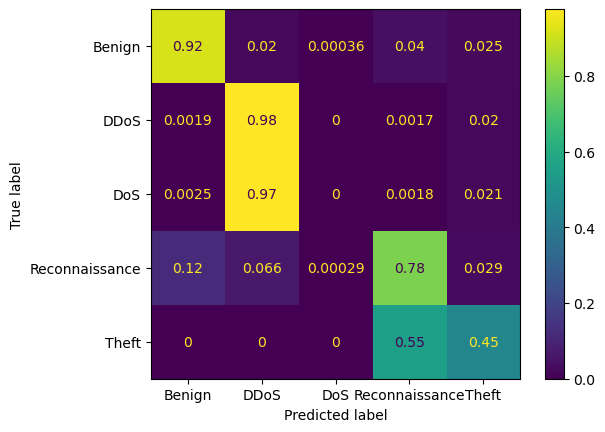

In [13]:
tester_inst.test_model(model_egs)

Total Samples: 120020
===== Multiclass Test Report =====
== Benign ==
Precision: 0.184026
Recall:    0.918470
F1-score:  0.306618

== DDoS ==
Precision: 0.389440
Recall:    0.976513
F1-score:  0.556818

== DoS ==
Precision: 0.000000
Recall:    0.000000
F1-score:  0.000000

== Reconnaissance ==
Precision: 0.995276
Recall:    0.785692
F1-score:  0.878152

== Theft ==
Precision: 0.050430
Recall:    0.445026
F1-score:  0.090594

== weighted avg ==
Precision: 0.821887
Recall:    0.731336
F1-score:  0.748840

= Global Metrics =
Accuracy:           0.731336
Balanced Accuracy:  0.625140

Confusion Matrix:
[[ 2546    56     0   102    68]
 [   22 11101     0    19   226]
 [   28 11083     0    21   235]
 [11239  6262     0 73958  2672]
 [    0     3     0   209   170]]

= Binary Metrics =
TN, TP, FN, FP are derived from the confusion matrix.
Benign is the negative class. The attack classes are positive.
Total Samples: 120020
TN: 2546
TP: 105959
FN: 11289
FP: 226

Accuracy: 0.904058
Balanced Acc

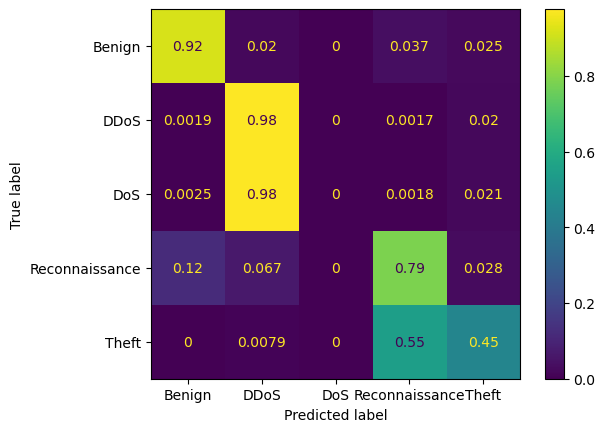

In [14]:
tester_inst.test_model(model_egs_cpu)

Total Samples: 120020
===== Multiclass Test Report =====
== Benign ==
Precision: 0.182873
Recall:    0.915224
F1-score:  0.304836

== DDoS ==
Precision: 0.389943
Recall:    0.976161
F1-score:  0.557274

== DoS ==
Precision: 0.000000
Recall:    0.000000
F1-score:  0.000000

== Reconnaissance ==
Precision: 0.995125
Recall:    0.784991
F1-score:  0.877655

== Theft ==
Precision: 0.050191
Recall:    0.447644
F1-score:  0.090261

== weighted avg ==
Precision: 0.821789
Recall:    0.730687
F1-score:  0.748452

= Global Metrics =
Accuracy:           0.730687
Balanced Accuracy:  0.624804

Confusion Matrix:
[[ 2537    55     1   111    68]
 [   22 11097     0    19   230]
 [   28 11079     0    21   239]
 [11286  6227    27 73892  2699]
 [    0     0     0   211   171]]

= Binary Metrics =
TN, TP, FN, FP are derived from the confusion matrix.
Benign is the negative class. The attack classes are positive.
Total Samples: 120020
TN: 2537
TP: 105912
FN: 11336
FP: 235

Accuracy: 0.903591
Balanced Acc

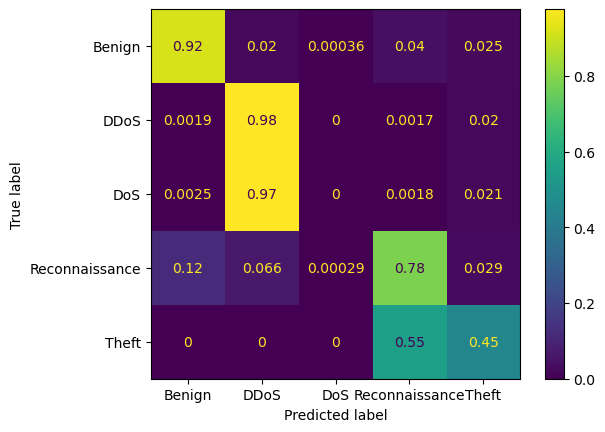

In [15]:
tester_inst_gpu = tester.ModelTester(randomized_ip_test_data, True)
tester_inst_gpu.test_model(model_egs)

Total Samples: 120020
===== Multiclass Test Report =====
== Benign ==
Precision: 0.210631
Recall:    0.919192
F1-score:  0.342726

== DDoS ==
Precision: 0.366554
Recall:    0.180859
F1-score:  0.242210

== DoS ==
Precision: 0.377714
Recall:    0.782176
F1-score:  0.509425

== Reconnaissance ==
Precision: 0.993776
Recall:    0.812495
F1-score:  0.894039

== Theft ==
Precision: 0.089807
Recall:    0.426702
F1-score:  0.148384

== weighted avg ==
Precision: 0.855055
Recall:    0.751033
F1-score:  0.780766

= Global Metrics =
Accuracy:           0.751033
Balanced Accuracy:  0.624285

Confusion Matrix:
[[ 2548   143    47     8    26]
 [    6  2056  8950   126   230]
 [    5  2099  8891   133   239]
 [ 9531  1311  5651 76481  1157]
 [    7     0     0   212   163]]

= Binary Metrics =
TN, TP, FN, FP are derived from the confusion matrix.
Benign is the negative class. The attack classes are positive.
Total Samples: 120020
TN: 2548
TP: 107699
FN: 9549
FP: 224

Accuracy: 0.918572
Balanced Accu

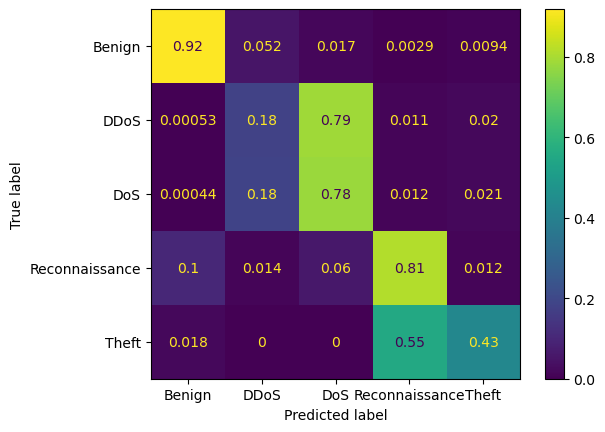

In [18]:
tester_inst.test_model(model_fnn)

Total Samples: 120020
===== Multiclass Test Report =====
== Benign ==
Precision: 0.218157
Recall:    0.907648
F1-score:  0.351765

== DDoS ==
Precision: 0.341405
Recall:    0.574243
F1-score:  0.428220

== DoS ==
Precision: 0.489368
Recall:    0.404944
F1-score:  0.443171

== Reconnaissance ==
Precision: 0.995058
Recall:    0.808565
F1-score:  0.892170

== Theft ==
Precision: 0.047537
Recall:    0.431937
F1-score:  0.085648

== weighted avg ==
Precision: 0.864293
Recall:    0.749233
F1-score:  0.790653

= Global Metrics =
Accuracy:           0.749233
Balanced Accuracy:  0.625467

Confusion Matrix:
[[ 2516    56     0   127    73]
 [   22  6528  4579    19   220]
 [   28  6488  4603    21   227]
 [ 8964  6046   224 76111  2786]
 [    3     3     0   211   165]]

= Binary Metrics =
TN, TP, FN, FP are derived from the confusion matrix.
Benign is the negative class. The attack classes are positive.
Total Samples: 120020
TN: 2516
TP: 108231
FN: 9017
FP: 256

Accuracy: 0.922738
Balanced Accu

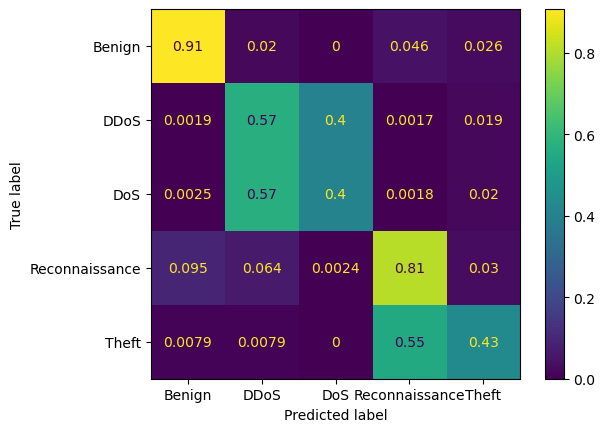

In [19]:
tester_inst.test_model(model_egsh)

## Non-Randomized IP Addresses and Ports

### Load Data

In [ ]:
multiclass = True
orig_ip_train_data = IoTDataset(version=1, multiclass=multiclass, randomize_source_ip=False)
orig_ip_val_data = IoTDataset(version=1, multiclass=multiclass, split='val', randomize_source_ip=False)
orig_ip_test_data = IoTDataset(version=1, multiclass=multiclass, split='test', randomize_source_ip=False)

### Model Initialization

In [ ]:
# Multiclass
model_egs_orig = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=orig_ip_train_data.num_features,
                                num_classes=len(orig_ip_train_data.classes)
                                )
model_fnn_orig = fnn_model.TestFNN(num_hidden_layers=2,
                              hidden_layer_widths=[128, 192],  # Should be approximately comparable to EGS
                              num_edge_attr=orig_ip_train_data.num_features,
                              num_classes=len(orig_ip_train_data.classes),
                            )
model_egsh_orig = e_graphsage_hembed.E_GraphSAGE_hEmbed(numLayers=2,
                                                   dim_node_embed=96,       # Approximately equal parameter count as EGS
                                                   num_edge_attr=orig_ip_train_data.num_features,
                                                   num_classes=len(orig_ip_train_data.classes)
                                                  )

### Training

In [ ]:
# Multiclass
# 175 epochs sufficient for EGS to get plateau of validation risk.
egs_orig_training_config = {
        'num_epochs': 175,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
# 205 epochs for the FNN
fnn_orig_training_config = {
        'num_epochs': 205,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egsh_orig_training_config = {
        'num_epochs': 205,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}

In [ ]:
# Instantiate Trainer
# Multiclass
egs_orig_trainer = ModelTrainer(egs_orig_training_config, orig_ip_train_data, orig_ip_val_data)
fnn_orig_trainer = ModelTrainer(fnn_orig_training_config, orig_ip_train_data, orig_ip_val_data)
egsh_orig_trainer = ModelTrainer(egsh_orig_training_config, orig_ip_train_data, orig_ip_val_data)

In [ ]:
# Train the GNN
_ = egs_orig_trainer.train_model(model_egs_orig, False)

In [ ]:
# Train the FCNN
_ = fnn_orig_trainer.train_model(model_fnn_orig, False)

In [ ]:
# Train the EGSH
_ = egsh_orig_trainer.train_model(model_egsh_orig, False)

### Testing

In [ ]:
tester_inst_orig = tester.ModelTester(orig_ip_test_data, False)

In [ ]:
tester_inst_orig.test_model(model_egs_orig)

In [ ]:
tester_inst_orig.test_model(model_fnn_orig)

In [ ]:
tester_inst_orig.test_model(model_egsh_orig)

# NF-ToN-IoT

## Randomized IP Addresses and Ports

### Load Data
This assumes there is a "data" folder under the root of the IoT_GNN repo.  
Datasets can be found at: https://drive.google.com/drive/folders/14t41P09gXTsCqPx3YFN1Pruwb2eZQrkT?usp=share_link

In [ ]:
multiclass = True
ton_randomized_ip_train_data = IoTDataset(dataset='NF-ToN-IoT', version=1, multiclass=multiclass)
ton_randomized_ip_val_data = IoTDataset(dataset='NF-ToN-IoT', version=1, multiclass=multiclass, split='val')
ton_randomized_ip_test_data = IoTDataset(dataset='NF-ToN-IoT', version=1, multiclass=multiclass, split='test')

### Model Initialization

In [ ]:
# Multiclass
model_egs_ton = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=ton_randomized_ip_train_data.num_features,
                                num_classes=len(ton_randomized_ip_train_data.classes)
                                )
model_fnn_ton = fnn_model.TestFNN(num_hidden_layers=2,
                              hidden_layer_widths=[128, 192],  # Should be approximately comparable to EGS
                              num_edge_attr=ton_randomized_ip_train_data.num_features,
                              num_classes=len(ton_randomized_ip_train_data.classes),
                            )
model_egsh_ton = e_graphsage_hembed.E_GraphSAGE_hEmbed(numLayers=2,
                                                   dim_node_embed=96,       # Approximately equal parameter count as EGS
                                                   num_edge_attr=ton_randomized_ip_train_data.num_features,
                                                   num_classes=len(ton_randomized_ip_train_data.classes)
                                                  )

### Training

In [ ]:
# Multiclass
# 175 epochs sufficient for EGS to get plateau of validation risk.
egs_training_config_ton = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
# 205 epochs for the FNN
fnn_training_config_ton = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egsh_training_config_ton = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}

In [ ]:
# Instantiate Trainer
# Multiclass
egs_trainer_ton = ModelTrainer(egs_training_config_ton, ton_randomized_ip_train_data, ton_randomized_ip_val_data)
fnn_trainer_ton = ModelTrainer(fnn_training_config_ton, ton_randomized_ip_train_data, ton_randomized_ip_val_data)
egsh_trainer_ton = ModelTrainer(egsh_training_config_ton, ton_randomized_ip_train_data, ton_randomized_ip_val_data)

In [ ]:
# Train the GNN
_ = egs_trainer_ton.train_model(model_egs_ton, False)

In [ ]:
# Train the FCNN
_ = fnn_trainer_ton.train_model(model_fnn_ton, False)

In [ ]:
# Train the EGSH
_ = egsh_trainer_ton.train_model(model_egsh_ton, False)

### Testing

In [ ]:
# If modify tester
import importlib
importlib.reload(tester)

In [ ]:
tester_inst_ton = tester.ModelTester(ton_randomized_ip_test_data, False)

In [ ]:
tester_inst_ton.test_model(model_egs_ton)

In [ ]:
tester_inst_ton.test_model(model_fnn_ton)

In [ ]:
tester_inst_ton.test_model(model_egsh_ton)

## Non-Randomized IP Addresses and Ports

### Load Data

In [ ]:
multiclass = True
ton_orig_ip_train_data = IoTDataset(dataset='NF-ToN-IoT', version=1, multiclass=multiclass, randomize_source_ip=False)
ton_orig_ip_val_data = IoTDataset(dataset='NF-ToN-IoT', version=1, multiclass=multiclass, split='val', randomize_source_ip=False)
ton_orig_ip_test_data = IoTDataset(dataset='NF-ToN-IoT', version=1, multiclass=multiclass, split='test', randomize_source_ip=False)

### Model Initialization

In [ ]:
# Multiclass
model_egs_orig_ton = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=ton_orig_ip_train_data.num_features,
                                num_classes=len(ton_orig_ip_train_data.classes)
                                )
model_fnn_orig_ton = fnn_model.TestFNN(num_hidden_layers=2,
                              hidden_layer_widths=[128, 192],  # Should be approximately comparable to EGS
                              num_edge_attr=ton_orig_ip_train_data.num_features,
                              num_classes=len(ton_orig_ip_train_data.classes),
                            )
model_egsh_orig_ton = e_graphsage_hembed.E_GraphSAGE_hEmbed(numLayers=2,
                                                   dim_node_embed=96,       # Approximately equal parameter count as EGS
                                                   num_edge_attr=ton_orig_ip_train_data.num_features,
                                                   num_classes=len(ton_orig_ip_train_data.classes)
                                                  )

### Training

In [ ]:
# Multiclass
# 175 epochs sufficient for EGS to get plateau of validation risk.
egs_orig_training_config_ton = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
# 205 epochs for the FNN
fnn_orig_training_config_ton = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egsh_orig_training_config_ton = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}

In [ ]:
# Instantiate Trainer
# Multiclass
egs_orig_trainer_ton = ModelTrainer(egs_orig_training_config_ton, ton_orig_ip_train_data, ton_orig_ip_val_data)
fnn_orig_trainer_ton = ModelTrainer(fnn_orig_training_config_ton, ton_orig_ip_train_data, ton_orig_ip_val_data)
egsh_orig_trainer_ton = ModelTrainer(egsh_orig_training_config_ton, ton_orig_ip_train_data, ton_orig_ip_val_data)

In [ ]:
# Train the GNN
_ = egs_orig_trainer_ton.train_model(model_egs_orig_ton, False)

In [ ]:
# Train the FCNN
_ = fnn_orig_trainer_ton.train_model(model_fnn_orig_ton, False)

In [ ]:
# Train the EGSH
_ = egsh_orig_trainer_ton.train_model(model_egsh_orig_ton, False)

### Testing

In [ ]:
tester_inst_orig_ton = tester.ModelTester(ton_orig_ip_test_data, False)

In [ ]:
tester_inst_orig_ton.test_model(model_egs_orig_ton)

In [ ]:
tester_inst_orig_ton.test_model(model_fnn_orig_ton)

In [ ]:
tester_inst_orig_ton.test_model(model_egsh_orig_ton)

# NF-UNSW-NB15

## Randomized IP Addresses and Ports

### Load Data
This assumes there is a "data" folder under the root of the IoT_GNN repo.  
Datasets can be found at: https://drive.google.com/drive/folders/14t41P09gXTsCqPx3YFN1Pruwb2eZQrkT?usp=share_link

In [ ]:
multiclass = True
nsw_randomized_ip_train_data = IoTDataset(dataset='NF-UNSW-NB15', version=1, multiclass=multiclass)
nsw_randomized_ip_val_data = IoTDataset(dataset='NF-UNSW-NB15', version=1, multiclass=multiclass, split='val')
nsw_randomized_ip_test_data = IoTDataset(dataset='NF-UNSW-NB15', version=1, multiclass=multiclass, split='test')

### Model Initialization

In [ ]:
# Multiclass
model_egs_nsw = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=nsw_randomized_ip_train_data.num_features,
                                num_classes=len(nsw_randomized_ip_train_data.classes)
                                )
model_fnn_nsw = fnn_model.TestFNN(num_hidden_layers=2,
                              hidden_layer_widths=[128, 192],  # Should be approximately comparable to EGS
                              num_edge_attr=nsw_randomized_ip_train_data.num_features,
                              num_classes=len(nsw_randomized_ip_train_data.classes),
                            )
model_egsh_nsw = e_graphsage_hembed.E_GraphSAGE_hEmbed(numLayers=2,
                                                   dim_node_embed=96,       # Approximately equal parameter count as EGS
                                                   num_edge_attr=nsw_randomized_ip_train_data.num_features,
                                                   num_classes=len(nsw_randomized_ip_train_data.classes)
                                                  )

### Training

In [ ]:
# Multiclass
# 175 epochs sufficient for EGS to get plateau of validation risk.
egs_training_config_nsw = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
# 205 epochs for the FNN
fnn_training_config_nsw = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egsh_training_config_nsw = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}

In [ ]:
# Instantiate Trainer
# Multiclass
egs_trainer_nsw = ModelTrainer(egs_training_config_nsw, nsw_randomized_ip_train_data, nsw_randomized_ip_val_data)
fnn_trainer_nsw = ModelTrainer(fnn_training_config_nsw, nsw_randomized_ip_train_data, nsw_randomized_ip_val_data)
egsh_trainer_nsw = ModelTrainer(egsh_training_config_nsw, nsw_randomized_ip_train_data, nsw_randomized_ip_val_data)

In [ ]:
# Train the GNN
_ = egs_trainer_nsw.train_model(model_egs_nsw, False)

In [ ]:
# Train the FCNN
_ = fnn_trainer_nsw.train_model(model_fnn_nsw, False)

In [ ]:
# Train the EGSH
_ = egsh_trainer_nsw.train_model(model_egsh_nsw, False)

### Testing

In [ ]:
# If modify tester
import importlib
importlib.reload(tester)

In [ ]:
tester_inst_nsw = tester.ModelTester(nsw_randomized_ip_test_data, False)

In [ ]:
tester_inst_nsw.test_model(model_egs_nsw)

In [ ]:
tester_inst_nsw.test_model(model_fnn_nsw)

In [ ]:
tester_inst_nsw.test_model(model_egsh_nsw)

## Non-Randomized IP Addresses and Ports

### Load Data

In [ ]:
multiclass = True
nsw_orig_ip_train_data = IoTDataset(dataset='NF-UNSW-NB15', version=1, multiclass=multiclass, randomize_source_ip=False)
nsw_orig_ip_val_data = IoTDataset(dataset='NF-UNSW-NB15', version=1, multiclass=multiclass, split='val', randomize_source_ip=False)
nsw_orig_ip_test_data = IoTDataset(dataset='NF-UNSW-NB15', version=1, multiclass=multiclass, split='test', randomize_source_ip=False)

### Model Initialization

In [ ]:
# Multiclass
model_egs_orig_nsw = e_graphsage.E_GraphSAGE(numLayers=2,
                                dim_node_embed=128,
                                num_edge_attr=nsw_orig_ip_train_data.num_features,
                                num_classes=len(nsw_orig_ip_train_data.classes)
                                )
model_fnn_orig_nsw = fnn_model.TestFNN(num_hidden_layers=2,
                              hidden_layer_widths=[128, 192],  # Should be approximately comparable to EGS
                              num_edge_attr=nsw_orig_ip_train_data.num_features,
                              num_classes=len(nsw_orig_ip_train_data.classes),
                            )
model_egsh_orig_nsw = e_graphsage_hembed.E_GraphSAGE_hEmbed(numLayers=2,
                                                   dim_node_embed=96,       # Approximately equal parameter count as EGS
                                                   num_edge_attr=nsw_orig_ip_train_data.num_features,
                                                   num_classes=len(nsw_orig_ip_train_data.classes)
                                                  )

### Training

In [ ]:
# Multiclass
# 175 epochs sufficient for EGS to get plateau of validation risk.
egs_orig_training_config_nsw = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
# 205 epochs for the FNN
fnn_orig_training_config_nsw = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}
egsh_orig_training_config_nsw = {
        'num_epochs': 1000,
        'lr': 1e-3,
        'gpu': False,
        'lr_sched_factor': np.sqrt(10),
        'lr_sched_patience': 10,
}

In [ ]:
# Instantiate Trainer
# Multiclass
egs_orig_trainer_nsw = ModelTrainer(egs_orig_training_config_nsw, nsw_orig_ip_train_data, nsw_orig_ip_val_data)
fnn_orig_trainer_nsw = ModelTrainer(fnn_orig_training_config_nsw, nsw_orig_ip_train_data, nsw_orig_ip_val_data)
egsh_orig_trainer_nsw = ModelTrainer(egsh_orig_training_config_nsw, nsw_orig_ip_train_data, nsw_orig_ip_val_data)

In [ ]:
# Train the GNN
_ = egs_orig_trainer_nsw.train_model(model_egs_orig_nsw, False)

In [ ]:
# Train the FCNN
_ = fnn_orig_trainer_nsw.train_model(model_fnn_orig_nsw, False)

In [ ]:
# Train the EGSH
_ = egsh_orig_trainer_nsw.train_model(model_egsh_orig_nsw, False)

### Testing

In [ ]:
tester_inst_orig_nsw = tester.ModelTester(nsw_orig_ip_test_data, False)

In [ ]:
tester_inst_orig_nsw.test_model(model_egs_orig_nsw)

In [ ]:
tester_inst_orig_nsw.test_model(model_fnn_orig_nsw)

In [ ]:
tester_inst_orig_nsw.test_model(model_egsh_orig_nsw)